In [29]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng=np.random

In [30]:
#超参数设定
#学习率的设置
learning_rate=0.01
training_epochs=1000
display_step=50

In [31]:
#训练数据
train_X=np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,\
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y =np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,\
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples=train_X.shape   #(17,)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0050 cost= [ 0.48550707  0.48550707] W= 0.461468 b= -0.80873
Epoch: 0100 cost= [ 0.35546413  0.35546413] W= 0.413159 b= -0.449382
Epoch: 0150 cost= [ 0.27673611  0.27673611] W= 0.375589 b= -0.169914
Epoch: 0200 cost= [ 0.22906123  0.22906123] W= 0.346371 b= 0.0474296
Epoch: 0250 cost= [ 0.20018122  0.20018122] W= 0.323647 b= 0.216459
Epoch: 0300 cost= [ 0.18267864  0.18267864] W= 0.305975 b= 0.347915
Epoch: 0350 cost= [ 0.17206536  0.17206536] W= 0.292231 b= 0.450148
Epoch: 0400 cost= [ 0.16562505  0.16562505] W= 0.281543 b= 0.529656
Epoch: 0450 cost= [ 0.16171327  0.16171327] W= 0.27323 b= 0.591489
Epoch: 0500 cost= [ 0.15933447  0.15933447] W= 0.266765 b= 0.639578
Epoch: 0550 cost= [ 0.15788573  0.15788573] W= 0.261738 b= 0.676976
Epoch: 0600 cost= [ 0.15700173  0.15700173] W= 0.257828 b= 0.706061
Epoch: 0650 cost= [ 0.15646109  0.15646109] W= 0.254787 b= 0.728681
Epoch: 0700 cost= [ 0.15612936  0.156129

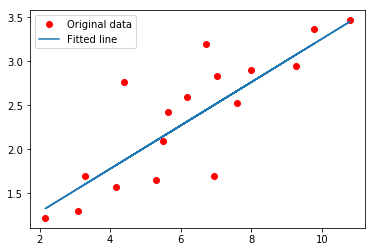

Testing... (Mean square loss Comparison)
Testing cost= 0.0897325
Absolute mean square loss difference: [ 0.06588724  0.06588724]


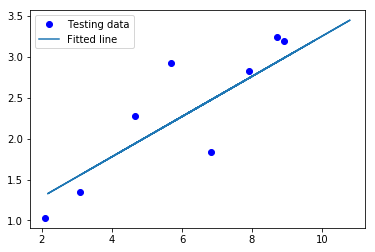

In [43]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
#设置模型的参数
W=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")
pred=tf.add(tf.multiply(X,W),b)
#均方误差损失函数
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
#进行梯度下降，找到最合适的参数
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    #拟合所有训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #显示
        if((epoch+1)%display_step==0):
            c=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", c,"W=", sess.run(W), "b=", sess.run(b))
            #print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=" ,sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    test_cost=sess.run(tf.reduce_sum(tf.pow(pred-Y,2))/(2*test_X.shape[0]),feed_dict={X:test_X,Y:test_Y})
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0050 cost= 0.113681354 W= 0.142855 b= 1.56934
Epoch: 0100 cost= 0.109455764 W= 0.149203 b= 1.52367
Epoch: 0150 cost= 0.105717480 W= 0.155173 b= 1.48072
Epoch: 0200 cost= 0.102410078 W= 0.160789 b= 1.44032
Epoch: 0250 cost= 0.099483937 W= 0.16607 b= 1.40233
Epoch: 0300 cost= 0.096894920 W= 0.171038 b= 1.36659
Epoch: 0350 cost= 0.094604261 W= 0.17571 b= 1.33298
Epoch: 0400 cost= 0.092577562 W= 0.180104 b= 1.30137
Epoch: 0450 cost= 0.090784356 W= 0.184237 b= 1.27164
Epoch: 0500 cost= 0.089197733 W= 0.188125 b= 1.24367
Epoch: 0550 cost= 0.087793760 W= 0.191781 b= 1.21736
Epoch: 0600 cost= 0.086551867 W= 0.195219 b= 1.19263
Epoch: 0650 cost= 0.085453093 W= 0.198453 b= 1.16937
Epoch: 0700 cost= 0.084480762 W= 0.201494 b= 1.14749
Epoch: 0750 cost= 0.083620422 W= 0.204355 b= 1.12691
Epoch: 0800 cost= 0.082859166 W= 0.207045 b= 1.10756
Epoch: 0850 cost= 0.082185507 W= 0.209575 b= 1.08936
Epoch: 0900 cost= 0.081589364 W= 0.211955 b= 1.07224
Epoch: 0950 cost= 0.081061788 W= 0.214193 b= 1.0

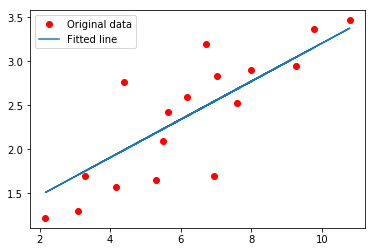

Testing... (Mean square loss Comparison)
Testing cost= 0.0897325
Absolute mean square loss difference: 0.00913762


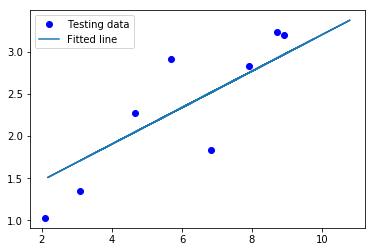

In [28]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    